# Data Overview

The second dataset has the following features:-

1. budget - The budget in which the movie was made.
2. genre - The genre of the movie, Action, Comedy ,Thriller etc.
3. homepage - A link to the homepage of the movie.
4. id - This is infact the movie_id as in the first dataset.
5. keywords - The keywords or tags related to the movie.
6. original_language - The language in which the movie was made.
7. original_title - The title of the movie before translation or adaptation.
8. overview - A brief description of the movie.
9. popularity - A numeric quantity specifying the movie popularity.
10. production_companies - The production house of the movie.
11. production_countries - The country in which it was produced.
12. release_date - The date on which it was released.
13. revenue - The worldwide revenue generated by the movie.
14. runtime - The running time of the movie in minutes.
15. status - "Released" or "Rumored".
16. tagline - Movie's tagline.
17. title - Title of the movie.
18. vote_average - average ratings the movie recieved.
19. vote_count - the count of votes recieved.

# Analytical Approach
#### The project involves multiple steps including:

1. Data Cleaning: Ensuring the dataset is clean, and formatted correctly for analysis and modeling.
2. Exploratory Data Analysis (EDA): Understanding the data distribution, relationships, and patterns.
3. Baseline Model Building: Employing machine learning algorithms to build a predictive model.
4. Model Refinement: Making necessary adjustments for improvement.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
movie_df = pd.read_csv(r"C:\Users\akash\Downloads\tmdb_5000_movies.csv")

In [102]:
movie_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [103]:
movie_df.shape

(4803, 20)

In [104]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [105]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [106]:
movie_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [107]:
movie_df.dropna(inplace=True)

In [108]:
movie_df.duplicated().sum()

0

In [109]:
movie_df.describe(exclude="object")

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.493000e+03,1493.000000,1493.000000,1.493000e+03,1493.000000,1493.000000,1493.000000
mean,4.589534e+07,65498.552579,35.749280,1.550083e+08,108.657736,6.272873,1323.557267
std,5.369219e+07,89841.824027,48.207525,2.408712e+08,19.378758,0.970480,1792.459010
min,0.000000e+00,11.000000,0.023681,0.000000e+00,0.000000,0.000000,0.000000
25%,7.500000e+06,8090.000000,11.624230,9.455232e+06,95.000000,5.800000,207.000000
50%,2.700000e+07,26320.000000,25.281197,6.254895e+07,106.000000,6.300000,616.000000
75%,6.300000e+07,76341.000000,45.149948,1.860537e+08,120.000000,6.900000,1652.000000
max,3.800000e+08,426469.000000,875.581305,2.787965e+09,201.000000,8.400000,13752.000000


In [110]:
movie_df.describe(include="object")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493
unique,555,1473,1414,22,1493,1493,1311,203,1221,233,2,1488,1493
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-12-25,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who is John Galt?,Avatar
freq,91,4,61,1435,1,1,41,936,5,1014,1492,2,1


In [111]:
movies_cleaned_df = movie_df.drop(columns=['homepage', 'title', 'status','production_countries'])
movies_cleaned_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466


In [113]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 4801
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1493 non-null   int64  
 1   genres                1493 non-null   object 
 2   id                    1493 non-null   int64  
 3   keywords              1493 non-null   object 
 4   original_language     1493 non-null   object 
 5   original_title        1493 non-null   object 
 6   overview              1493 non-null   object 
 7   popularity            1493 non-null   float64
 8   production_companies  1493 non-null   object 
 9   release_date          1493 non-null   object 
 10  revenue               1493 non-null   int64  
 11  runtime               1493 non-null   float64
 12  spoken_languages      1493 non-null   object 
 13  tagline               1493 non-null   object 
 14  vote_average          1493 non-null   float64
 15  vote_count           

In [114]:
# Calculate all the components based on the above formula
v=movies_cleaned_df['vote_count']
R=movies_cleaned_df['vote_average']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70)


In [115]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [116]:
movies_cleaned_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,7.103342
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,6.753357
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,6.293620


In [117]:
movie_sort_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)
movie_sort_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(10)

,original_title,vote_count,vote_average,weighted_average,popularity
662,Fight Club,9413,8.3,8.041892,146.757391
65,The Dark Knight,12002,8.2,8.002121,187.322927
3337,The Godfather,5893,8.4,7.997958,143.659698
96,Inception,13752,8.1,7.934095,167.583710
95,Interstellar,10867,8.1,7.894992,724.247784
1990,The Empire Strikes Back,5879,8.2,7.835057,78.517830
329,The Lord of the Rings: The Return of the King,8064,8.1,7.834103,123.630332
1818,Schindler's List,4329,8.3,7.811775,104.469351
3865,Whiplash,4254,8.3,7.805268,192.528841
2912,Star Wars,6624,8.1,7.786226,126.393695


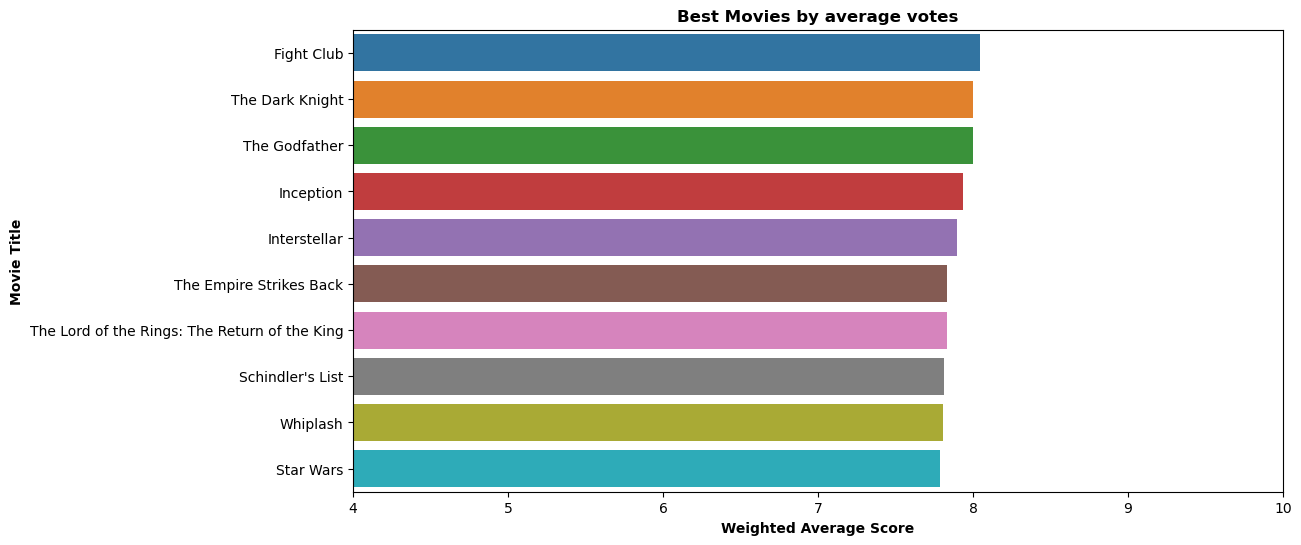

In [118]:
weight_average=movie_sort_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), 
                  y=weight_average['original_title'].head(10), 
                  data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

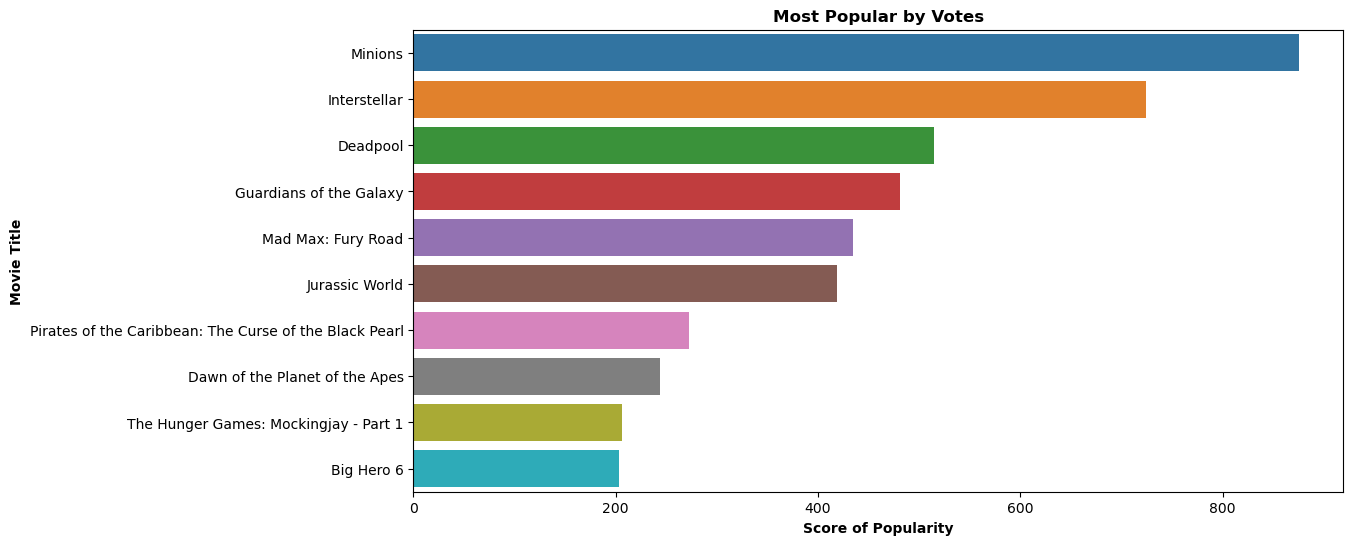

In [119]:
popularity=movie_sort_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10),
               y=popularity['original_title'].head(10),
               data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.680488,0.171792
1,0.561342,0.158823
2,0.404833,0.122611
3,0.790355,0.128249
4,0.362029,0.050143


In [121]:
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [122]:
movies_cleaned_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,7.103342,0.680488,0.171792
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,6.753357,0.561342,0.158823
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,6.293620,0.404833,0.122611


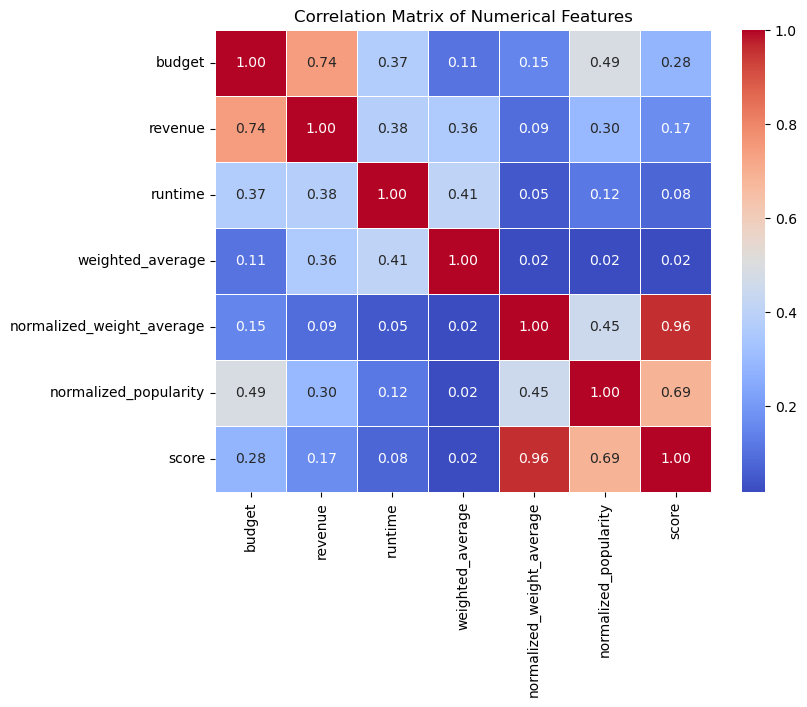

In [141]:
# Calculating the correlation matrix
correlation_matrix = movies_cleaned_df[['budget', 'revenue', 'runtime', 'weighted_average', 'normalized_weight_average', 'normalized_popularity','score']].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

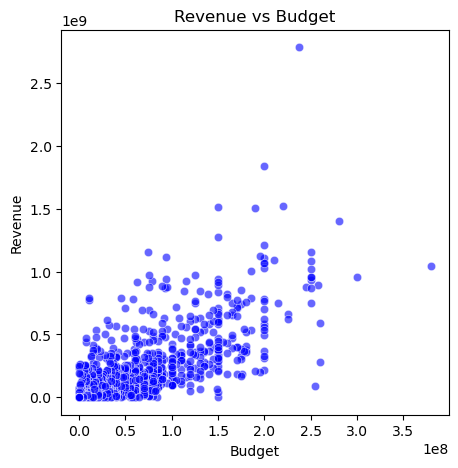

In [145]:
# Revenue vs Budget
plt.figure(figsize=(5, 5))
sns.scatterplot(data=movies_cleaned_df, x='budget', y='revenue', color='blue', alpha=0.6)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

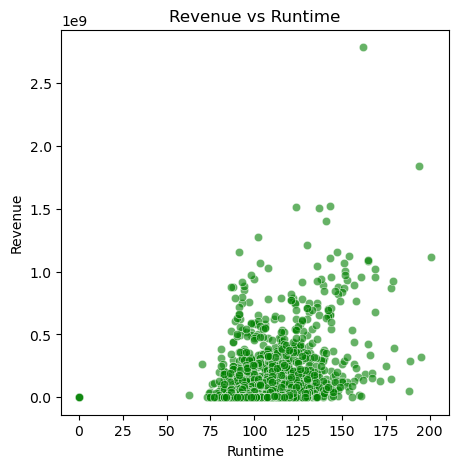

In [146]:
# Revenue vs Runtime
plt.figure(figsize=(5, 5))
sns.scatterplot(data=movies_cleaned_df, x='runtime', y='revenue', color='green', alpha=0.6)
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

In [123]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weight_average,normalized_popularity,score
76,G.I. Joe: The Rise of Cobra,0.949991,0.827158,0.888574
54,The Good Dinosaur,0.986461,0.213920,0.600190
101,X-Men: First Class,0.673258,0.495975,0.584617
77,Inside Out,0.963303,0.191375,0.577339
189,Noah,0.905615,0.157643,0.531629
71,The Mummy: Tomb of the Dragon Emperor,0.822558,0.232664,0.527611
776,Winter's Tale,0.921661,0.119290,0.520476
818,Captain Phillips,0.929587,0.089650,0.509619
389,The Three Musketeers,0.846551,0.163345,0.504948
386,The Bourne Supremacy,0.887627,0.118410,0.503018


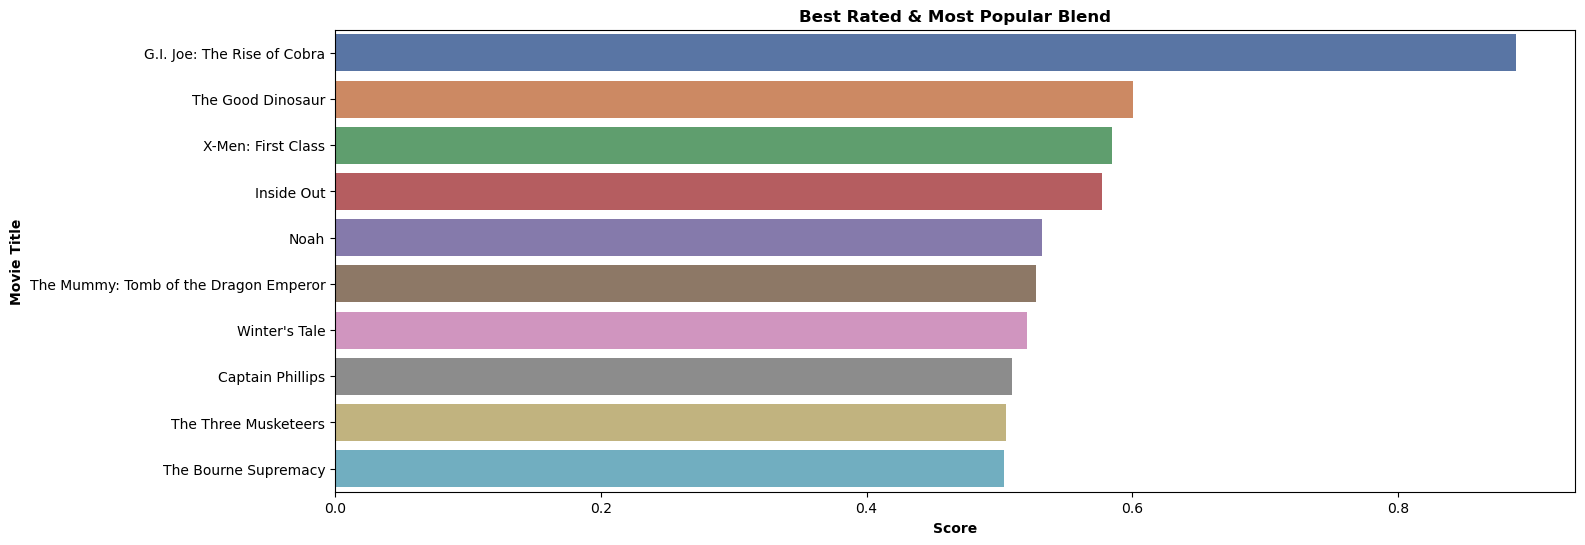

In [124]:
scored_df = movies_cleaned_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')

In [125]:
movies_cleaned_df.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=4,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(2, 4),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

In [127]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [128]:
tfv_matrix.shape

(1493, 238)

In [129]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [130]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()


In [131]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
Clerks                                      4773
Dry Spell                                   4781
Tin Can Man                                 4791
Primer                                      4796
Shanghai Calling                            4801
Length: 1493, dtype: int64

In [132]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [133]:
idx = indices['Interstellar']
idx

95

In [134]:
sig_scores = list(enumerate(sig[95]))
sig_scores   

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7615941559557649),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761

In [135]:
m = movies_cleaned_df['original_title'].iloc[1352]
m

'The Ghastly Love of Johnny X'

In [136]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Interstellar')

2722                           Seven Psychopaths
2050                    The Transporter Refueled
2371                                  RockNRolla
0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
5                                   Spider-Man 3
6                                        Tangled
Name: original_title, dtype: object